<center><h1>Credit Card Fraud Detection</h1></center>

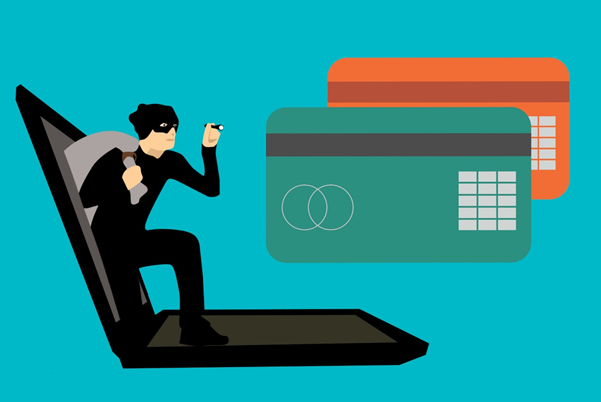

## by Ahmed Abdelmonem Abouelmagd

## Introduction

In this project, we aim to investigate the use of various machine learning algorithms for detecting credit card fraud. The methodology adopted includes the utilization of the Python programming language along with various algorithms such as Decision Trees, Artificial Neural Networks, and others. The objective is to fit models to the provided data and analyze the results to gain insights and derive performance curves.

# importing libraries

In [1]:
##Importing libraries##
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

##Suppressing warnings##
import warnings
warnings.filterwarnings('ignore')

# 1.Data Wrangling


In [2]:
#Reading the dataset
df = pd.read_csv("creditcard.csv")
#Exploring the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Check dataset columns datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 2.Data Cleaning

In [4]:
# Check if there are any null values in the DataFrame
if df.isnull().any().any():
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

# Get the number of duplicate rows
num_duplicates = df.duplicated().sum()
# Drop the duplicate rows
df = df.drop_duplicates()
# Get the number of rows that were removed
num_removed = num_duplicates - df.duplicated().sum()
print(f'{num_removed} duplicate rows removed.')

There are no null values in the DataFrame.
1081 duplicate rows removed.


# 3.Explaratory Data Analysis

0    283253
1       473
Name: Class, dtype: int64


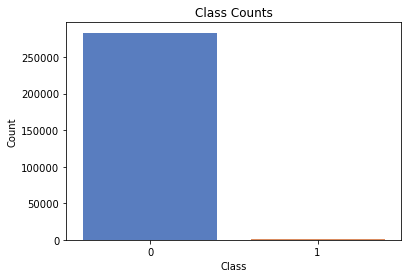

In [5]:
#Count the number of occurrences for defrauded and frauded credit cards
class_counts = df['Class'].value_counts()
print(class_counts)

#Plot the class count
sns.countplot(x='Class', data=df, palette='muted')

#Add labels and show plot
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

In [6]:
#Scale the 'Amount' feature using MinMaxScaler
scaler = MinMaxScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

#Print the first five rows of the 'Amount' column
print(df['Amount'].head())

#Note: This code uses MinMaxScaler to scale the 'Amount' feature of the dataframe to be in the range of 0 to 1.
#The transformed feature is then overwritten on the original feature column.
#The head of the transformed feature column is then printed to ensure that the feature scaling has been applied correctly.

0    0.005824
1    0.000105
2    0.014739
3    0.004807
4    0.002724
Name: Amount, dtype: float64


## Create correlation matrix

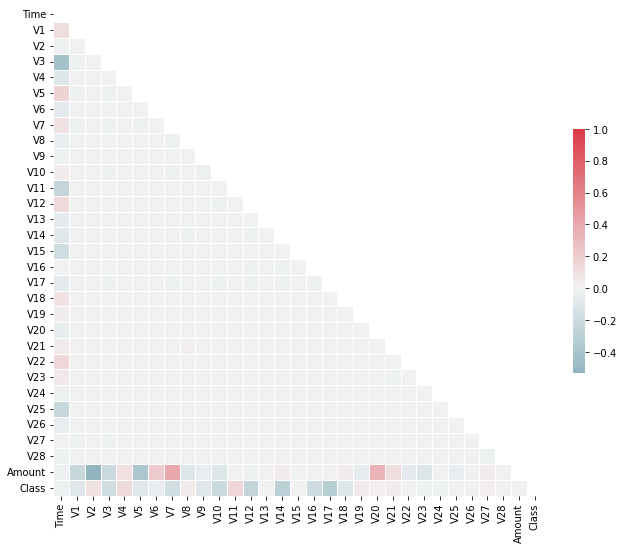

In [7]:
# Create correlation matrix
corr = df.corr()

# Generate a mask the size of our correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show plot
plt.show()

# 4.Splitting the Data and Model training


In [8]:
def preprocess_and_compare(df, num_samples_list):
    """
    Preprocess the data and compare the performance of several classifiers.
    
    Parameters:
    df (DataFrame): The original dataframe
    num_samples_list (list): List of the number of samples to be taken from the defrauded class
    
    Returns:
    None
    """
    results = {'Random Forest': [], 'Decision Tree': [], 'Logistic Regression': [], 'SVM': [], 'GaussianNB': []}
    for num_samples in num_samples_list:
        frauded = df[df.Class == 1]
        defrauded = df[df.Class == 0]

        #Randomly select the specified number of samples from the defrauded class
        sampleOfDefrauded = defrauded.sample(n = num_samples, random_state = 42)

        #Concatenate the sampled defrauded class with the frauded class to create the new dataframe
        newdf = pd.concat([sampleOfDefrauded,frauded],axis = 0)
        # Split the data into features and labels
        X = newdf.iloc[:,:-1]
        Y = newdf.iloc[:,-1]

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, shuffle=True, random_state=42)
    
        models = {'Random Forest': RandomForestClassifier(n_estimators=100),
              'Decision Tree': DecisionTreeClassifier(),
              'Logistic Regression': LogisticRegression(),
              'SVM': SVC(),
              'GaussianNB': GaussianNB()}
    
        for name, model in models.items():
            # Fit the model to the training data
            model.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = model.predict(X_test)

            # Calculate performance metrics
            accuracy = metrics.accuracy_score(y_test, y_pred)
            results[name].append({'samples': num_samples, 'accuracy': accuracy})

    # visualization for each model's accuracy
    plt.figure(figsize=(12,8))
    for name in results.keys():
        sns.lineplot(x="samples", y="accuracy", data=pd.DataFrame(results[name]), label=name)
    plt.ylim(0.5, 1)
    plt.ylabel("Accuracy")
    plt.xlabel("Number of Samples")
    plt.title("Models Accuracy Comparison")
    plt.legend()
    plt.show()

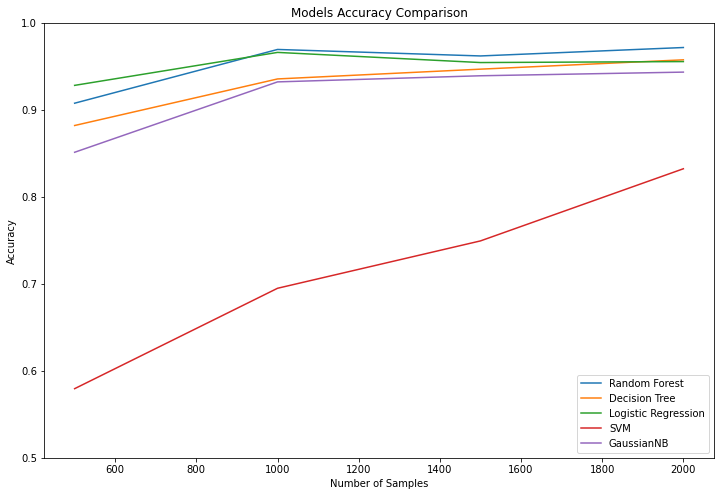

In [9]:
preprocess_and_compare(df, [500, 1000, 1500, 2000])

# Conclusion

In conclusion, it was observed that the Support Vector Machine (SVM) algorithm had the lowest accuracy among all the models tested, even when the number of samples was increased. Therefore, it is not recommended to use the SVM algorithm for this classification task. On the other hand, both Logistic Regression and Random Forest models demonstrated high accuracy levels. Furthermore, when the number of samples was increased, it was observed that the Random Forest model performed better than the Logistic Regression model. Based on these findings, it is suggested to use either the Logistic Regression or Random Forest algorithms for this credit card fraud detection task.